## JWST F1800W 30Dor ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 20 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1800W"
fwhm = 5.2
basename = "jw0272900200"

crval = [84.69695784078512, -69.09492271266589]
# rotation = 0.0
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [0.2342195515193774, -0.9316779689106902]
tile2_shifts = [0.7884962280416655, -0.09212854823862968]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [100., 3000.]
# display range for calibrated images
drange_cal = [200., 3000.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = "RefFiles/flat_F1800W_kdg_10jun22.fits"

# turn off the 1st frame flaging - very bright saturating data so firstframe effect is very small in comparision
#   recovers a large portion of the saturating region
firstframe = False

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1800W/stage0/jw02729002001_02107_00010_mirimage_uncal.fits', './F1800W/stage0/jw02729002001_02107_00008_mirimage_uncal.fits', './F1800W/stage0/jw02729002001_02107_00007_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00005_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00006_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00003_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00010_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00007_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00008_mirimage_uncal.fits', './F1800W/stage0/jw02729002001_02107_00001_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00001_mirimage_uncal.fits', './F1800W/stage0/jw02729002002_02107_00004_mirimage_uncal.fits', './F1800W/stage0/jw02729002001_02107_00004_mirimage_uncal.fits', './F1800W/stage0/jw02729002001_02107_00003_mirimage_uncal.fits', './F1800W/stage0/jw02729002001_02107_00005_mirimage_uncal.fits', './F1800W/stage0/jw02729

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile, firstframe=firstframe)

2022-07-20 13:53:50,584 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-20 13:53:50,585 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 13:53:50,586 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-20 13:53:50,586 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-20 13:53:50,587 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-20 13:53:50,587 - stpipe 

./F1800W/stage0/jw02729002001_02107_00010_mirimage_uncal.fits


2022-07-20 13:53:50,691 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1800W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-20 13:53:53,119 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-20 13:53:53,120 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-20 13:53:53,122 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-20 13:53:53,215 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00010_mirimage_uncal.fits>,).
2022-07-20 13:53:53,216 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:53:53,235 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri

2022-07-20 13:53:59,493 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-20 13:53:59,493 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-20 13:53:59,493 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-20 13:53:59,494 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-20 13:53:59,494 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-20 13:53:59,494 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-20 13:53:59,494 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-20 13:53:59,494 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-20 13:53:59,495 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-20 13:53:59,778 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-20 13:54:00,796 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:54:00,801 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10496 pixels with at least one CR from five groups.
2022-07-20 13:54:00,802 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 511 pixels with at least one CR from four groups.
2022-07-20 13:54:00,847 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:54:00,850 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10822 pixels with at least one CR from five groups.
2022-07-20 13:54:00,851 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point 

2022-07-20 13:54:04,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 125 pixels with at least one CR from four groups.
2022-07-20 13:54:04,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 210 pixels with at least one CR from three groups.
2022-07-20 13:54:04,568 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:54:04,609 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:54:04,615 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1595 pixels with at least one CR from five groups.
2022-07-20 13:54:04,615 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 153 pixels with at least one CR from four groups.
2022-07-20 13:54:04,616 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 41 pixels with at least one CR from three groups.
2022-07-20 13:54:04,652 - stpipe.Detector1Pipeline.

2022-07-20 13:54:06,028 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 338 pixels with at least one CR from four groups.
2022-07-20 13:54:06,029 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 177 pixels with at least one CR from three groups.
2022-07-20 13:54:07,608 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:54:07,651 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2161 pixels with at least one CR from five groups.
2022-07-20 13:54:07,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 351 pixels with at least one CR from four groups.
2022-07-20 13:54:07,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 223 pixels with at least one CR from three groups.
2022-07-20 13:54:07,970 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:54:08,010 - stpipe.Detector1Pipeline

2022-07-20 13:54:18,851 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-20 13:54:18,852 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 13:54:18,852 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-20 13:54:18,853 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-20 13:54:18,853 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-20 13:54:18,854 - stpipe 

./F1800W/stage0/jw02729002001_02107_00008_mirimage_uncal.fits


2022-07-20 13:54:19,200 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:54:19,203 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:54:19,205 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:54:19,205 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:54:19,206 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:54:22,544 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:54:22,562 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:54:23,031 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:54:23,127 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00008_mirimage_uncal.fits>,).
2022-07-20 13:54:23,128 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:54:26,880 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:54:26,887 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:54:26,890 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17906 pixels with at least one CR from five groups.
2022-07-20 13:54:26,890 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2992 pixels with at least one CR from four groups.
2022-07-20 13:54:26,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4470 pixels with at least one CR from three groups.
2022-07-20 13:54:26,941 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:54:26,944 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 13:54:30,413 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 161 pixels with at least one CR from four groups.
2022-07-20 13:54:30,414 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 96 pixels with at least one CR from three groups.
2022-07-20 13:54:30,692 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:54:30,738 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 928 pixels with at least one CR from five groups.
2022-07-20 13:54:30,739 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 75 pixels with at least one CR from four groups.
2022-07-20 13:54:30,740 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-20 13:54:30,872 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:54:30,917 - stpipe.Detector1Pipeline.jum

2022-07-20 13:54:32,443 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1909 pixels with at least one CR from five groups.
2022-07-20 13:54:32,444 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 281 pixels with at least one CR from four groups.
2022-07-20 13:54:32,444 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 94 pixels with at least one CR from three groups.
2022-07-20 13:54:32,487 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1831 pixels with at least one CR from five groups.
2022-07-20 13:54:32,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 225 pixels with at least one CR from four groups.
2022-07-20 13:54:32,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 91 pixels with at least one CR from three groups.
2022-07-20 13:54:32,725 - stpipe.Detector1Pipeline.jump - INFO - Working on inte

2022-07-20 13:54:43,442 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:54:43,444 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:54:43,467 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:54:43,469 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:54:44,220 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:54:44,221 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:54:45,207 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:54:45,209 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:54:47,114 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:54:47,116 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4


2022-07-20 13:54:49,779 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:54:49,779 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:54:49,780 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:54:49,781 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00007_mirimage_uncal.fits


2022-07-20 13:54:50,120 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:54:50,123 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:54:50,124 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:54:50,125 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:54:50,126 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:54:53,430 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:54:53,449 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:54:53,912 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:54:54,009 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00007_mirimage_uncal.fits>,).
2022-07-20 13:54:54,010 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:54:57,747 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:54:57,749 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19514 pixels with at least one CR from five groups.
2022-07-20 13:54:57,749 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:54:57,750 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1661 pixels with at least one CR from four groups.
2022-07-20 13:54:57,751 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2916 pixels with at least one CR from three groups.
2022-07-20 13:54:57,813 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-

2022-07-20 13:55:00,717 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:55:00,720 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 993 pixels with at least one CR from five groups.
2022-07-20 13:55:00,720 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 374 pixels with at least one CR from four groups.
2022-07-20 13:55:00,721 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 310 pixels with at least one CR from three groups.
2022-07-20 13:55:00,727 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:55:00,775 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-2

2022-07-20 13:55:02,326 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 103 pixels with at least one CR from four groups.
2022-07-20 13:55:02,326 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 43 pixels with at least one CR from three groups.
2022-07-20 13:55:02,420 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:55:02,465 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1732 pixels with at least one CR from five groups.
2022-07-20 13:55:02,466 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 124 pixels with at least one CR from four groups.
2022-07-20 13:55:02,466 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 51 pixels with at least one CR from three groups.
2022-07-20 13:55:02,475 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:55:02,521 - stpipe.Detector1Pipeline.j

2022-07-20 13:55:10,420 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:10,641 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:10,643 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:11,277 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:11,278 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:11,978 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:11,980 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:13,526 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:13,528 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:13,671 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 13:55:

2022-07-20 13:55:17,003 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:55:17,004 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:55:17,004 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:55:17,005 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00005_mirimage_uncal.fits


2022-07-20 13:55:17,370 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:55:17,373 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:55:17,374 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:55:17,375 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:55:17,377 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:55:20,736 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:55:20,754 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:55:21,229 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:55:21,338 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00005_mirimage_uncal.fits>,).
2022-07-20 13:55:21,339 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:55:25,083 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 35779 pixels with at least one CR from five groups.
2022-07-20 13:55:25,084 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10005 pixels with at least one CR from four groups.
2022-07-20 13:55:25,085 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3337 pixels with at least one CR from three groups.
2022-07-20 13:55:25,116 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:55:25,121 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:55:25,124 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 36590 pixels with at least one CR from five groups.
2022-07-20 13:55:25,125 - stpipe.Detector1Pipeline.jump - INFO - From

2022-07-20 13:55:32,510 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:55:32,557 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:55:32,560 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2273 pixels with at least one CR from five groups.
2022-07-20 13:55:32,561 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 688 pixels with at least one CR from four groups.
2022-07-20 13:55:32,561 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 324 pixels with at least one CR from three groups.
2022-07-20 13:55:32,931 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:55:32,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2097 pixels with at least one CR f

2022-07-20 13:55:36,590 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 307 pixels with at least one CR from four groups.
2022-07-20 13:55:36,591 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 166 pixels with at least one CR from three groups.
2022-07-20 13:55:36,680 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:55:36,720 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2909 pixels with at least one CR from five groups.
2022-07-20 13:55:36,721 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1738 pixels with at least one CR from four groups.
2022-07-20 13:55:36,722 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1765 pixels with at least one CR from three groups.
2022-07-20 13:55:37,079 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:55:37,082 - stpipe.Detector1Pipeli

2022-07-20 13:55:46,839 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:46,939 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:46,941 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:47,094 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:47,096 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:47,117 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:47,119 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:47,560 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:55:47,562 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:55:47,700 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 13:55:

2022-07-20 13:55:50,163 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:55:50,164 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:55:50,164 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:55:50,165 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00006_mirimage_uncal.fits


2022-07-20 13:55:50,520 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:55:50,524 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:55:50,525 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:55:50,525 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:55:50,526 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:55:54,071 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:55:54,092 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:55:54,579 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:55:54,683 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00006_mirimage_uncal.fits>,).
2022-07-20 13:55:54,685 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:55:58,394 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:55:58,398 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:55:58,401 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 30970 pixels with at least one CR from five groups.
2022-07-20 13:55:58,402 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10192 pixels with at least one CR from four groups.
2022-07-20 13:55:58,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4967 pixels with at least one CR from three groups.
2022-07-20 13:55:58,437 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:55:58,441 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:

2022-07-20 13:56:03,701 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 401 pixels with at least one CR from four groups.
2022-07-20 13:56:03,701 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 830 pixels with at least one CR from three groups.
2022-07-20 13:56:03,855 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:56:03,901 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1618 pixels with at least one CR from five groups.
2022-07-20 13:56:03,902 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 552 pixels with at least one CR from four groups.
2022-07-20 13:56:03,902 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 310 pixels with at least one CR from three groups.
2022-07-20 13:56:04,192 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:56:04,236 - stpipe.Detector1Pipeline

2022-07-20 13:56:06,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 775 pixels with at least one CR from four groups.
2022-07-20 13:56:06,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1028 pixels with at least one CR from three groups.
2022-07-20 13:56:07,033 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:56:07,065 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:56:07,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4558 pixels with at least one CR from five groups.
2022-07-20 13:56:07,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1059 pixels with at least one CR from four groups.
2022-07-20 13:56:07,072 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1881 pixels with at least one CR from three groups.
2022-07-20 13:56:07,105 - stpipe.Detector1Pipel

2022-07-20 13:56:19,089 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:19,529 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:19,531 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:19,565 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:19,567 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:19,770 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:19,772 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:19,785 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:19,787 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:19,933 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 13:56:

2022-07-20 13:56:23,467 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:56:23,468 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:56:23,468 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:56:23,469 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00003_mirimage_uncal.fits


2022-07-20 13:56:23,812 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:56:23,815 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:56:23,816 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:56:23,817 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:56:23,819 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:56:27,273 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:56:27,292 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:56:27,770 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:56:27,876 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00003_mirimage_uncal.fits>,).
2022-07-20 13:56:27,877 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:56:31,697 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:56:31,710 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 692 pixels with at least one CR from three groups.
2022-07-20 13:56:31,705 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:56:31,708 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 39205 pixels with at least one CR from five groups.
2022-07-20 13:56:31,709 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3269 pixels with at least one CR from four groups.
2022-07-20 13:56:31,744 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:56:31,746 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:12

2022-07-20 13:56:38,690 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 615 pixels with at least one CR from four groups.
2022-07-20 13:56:38,691 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 200 pixels with at least one CR from three groups.
2022-07-20 13:56:38,874 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:56:38,914 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1912 pixels with at least one CR from five groups.
2022-07-20 13:56:38,915 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 572 pixels with at least one CR from four groups.
2022-07-20 13:56:38,916 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 425 pixels with at least one CR from three groups.
2022-07-20 13:56:39,101 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:56:39,140 - stpipe.Detector1Pipeline

2022-07-20 13:56:42,166 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:56:42,177 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2917 pixels with at least one CR from five groups.
2022-07-20 13:56:42,178 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 957 pixels with at least one CR from four groups.
2022-07-20 13:56:42,178 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 884 pixels with at least one CR from three groups.
2022-07-20 13:56:42,206 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2529 pixels with at least one CR from five groups.
2022-07-20 13:56:42,206 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1452 pixels with at least one CR from four groups.
2022-07-20 13:56:42,207 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1528 pixels with at least one CR from

2022-07-20 13:56:52,339 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:52,341 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:52,503 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:52,505 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:52,532 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:52,533 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:52,606 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:52,608 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:56:52,874 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:56:52,876 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4


2022-07-20 13:56:55,397 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:56:55,398 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:56:55,398 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:56:55,399 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00010_mirimage_uncal.fits


2022-07-20 13:56:55,744 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00010_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:56:55,751 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:56:55,753 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:56:55,753 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:56:55,754 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:56:59,207 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:56:59,226 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:56:59,693 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:56:59,799 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00010_mirimage_uncal.fits>,).
2022-07-20 13:56:59,801 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:57:03,538 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:57:03,546 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:57:03,549 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 31193 pixels with at least one CR from five groups.
2022-07-20 13:57:03,550 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10306 pixels with at least one CR from four groups.
2022-07-20 13:57:03,551 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7461 pixels with at least one CR from three groups.
2022-07-20 13:57:03,577 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:57:03,586 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:

2022-07-20 13:57:10,621 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 410 pixels with at least one CR from four groups.
2022-07-20 13:57:10,622 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 517 pixels with at least one CR from three groups.
2022-07-20 13:57:10,704 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:57:10,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1675 pixels with at least one CR from five groups.
2022-07-20 13:57:10,748 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 766 pixels with at least one CR from four groups.
2022-07-20 13:57:10,749 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1065 pixels with at least one CR from three groups.
2022-07-20 13:57:10,813 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:57:10,855 - stpipe.Detector1Pipelin

2022-07-20 13:57:12,297 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1278 pixels with at least one CR from four groups.
2022-07-20 13:57:12,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1253 pixels with at least one CR from three groups.
2022-07-20 13:57:12,351 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:57:12,388 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3398 pixels with at least one CR from five groups.
2022-07-20 13:57:12,389 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1235 pixels with at least one CR from four groups.
2022-07-20 13:57:12,389 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1238 pixels with at least one CR from three groups.
2022-07-20 13:57:12,503 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:57:12,543 - stpipe.Detector1Pipe

2022-07-20 13:57:26,180 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:26,270 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:26,272 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:26,273 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:26,275 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:26,757 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:26,759 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:27,540 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:27,542 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:27,695 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 13:57:

2022-07-20 13:57:30,119 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:57:30,120 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:57:30,120 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:57:30,121 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00007_mirimage_uncal.fits


2022-07-20 13:57:30,475 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:57:30,478 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:57:30,479 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:57:30,480 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:57:30,481 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:57:33,972 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:57:33,990 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:57:34,468 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:57:34,575 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00007_mirimage_uncal.fits>,).
2022-07-20 13:57:34,576 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:57:38,408 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:57:38,414 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:57:38,418 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 30932 pixels with at least one CR from five groups.
2022-07-20 13:57:38,419 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10309 pixels with at least one CR from four groups.
2022-07-20 13:57:38,419 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7011 pixels with at least one CR from three groups.
2022-07-20 13:57:38,455 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022

2022-07-20 13:57:44,212 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1051 pixels with at least one CR from four groups.
2022-07-20 13:57:44,213 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 662 pixels with at least one CR from three groups.
2022-07-20 13:57:44,255 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:57:44,297 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1699 pixels with at least one CR from five groups.
2022-07-20 13:57:44,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 439 pixels with at least one CR from four groups.
2022-07-20 13:57:44,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 471 pixels with at least one CR from three groups.
2022-07-20 13:57:44,574 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:57:44,615 - stpipe.Detector1Pipelin

2022-07-20 13:57:46,421 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 711 pixels with at least one CR from four groups.
2022-07-20 13:57:46,422 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1180 pixels with at least one CR from three groups.
2022-07-20 13:57:46,684 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:57:46,692 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:57:46,723 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2954 pixels with at least one CR from five groups.
2022-07-20 13:57:46,724 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1256 pixels with at least one CR from four groups.
2022-07-20 13:57:46,724 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 971 pixels with at least one CR from three groups.
2022-07-20 13:57:46,728 - stpipe.Detector1Pipeli

2022-07-20 13:57:57,973 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:58,054 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:58,056 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:58,121 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:58,123 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:58,347 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:58,349 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:59,595 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:57:59,596 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:57:59,738 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 13:57:

2022-07-20 13:58:04,016 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:58:04,018 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:58:04,018 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:58:04,019 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00008_mirimage_uncal.fits


2022-07-20 13:58:04,371 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:58:04,375 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:58:04,376 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:58:04,377 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:58:04,378 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:58:07,803 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:58:07,822 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:58:08,299 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:58:08,409 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00008_mirimage_uncal.fits>,).
2022-07-20 13:58:08,410 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:58:12,179 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:58:12,185 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:58:12,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 47114 pixels with at least one CR from five groups.
2022-07-20 13:58:12,190 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8685 pixels with at least one CR from four groups.
2022-07-20 13:58:12,190 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3200 pixels with at least one CR from three groups.
2022-07-20 13:58:12,218 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:58:12,226 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 13:58:19,268 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1684 pixels with at least one CR from five groups.
2022-07-20 13:58:19,269 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1020 pixels with at least one CR from four groups.
2022-07-20 13:58:19,269 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 663 pixels with at least one CR from three groups.
2022-07-20 13:58:19,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2411 pixels with at least one CR from five groups.
2022-07-20 13:58:19,300 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 635 pixels with at least one CR from four groups.
2022-07-20 13:58:19,300 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 564 pixels with at least one CR from three groups.
2022-07-20 13:58:19,567 - stpipe.Detector1Pipeline.jump - INFO - Working on i

2022-07-20 13:58:22,618 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2588 pixels with at least one CR from five groups.
2022-07-20 13:58:22,618 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1490 pixels with at least one CR from four groups.
2022-07-20 13:58:22,619 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1569 pixels with at least one CR from three groups.
2022-07-20 13:58:22,643 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 13:58:22,690 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4043 pixels with at least one CR from five groups.
2022-07-20 13:58:22,691 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 740 pixels with at least one CR from four groups.
2022-07-20 13:58:22,692 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 326 pixels with at least one CR from

2022-07-20 13:58:35,610 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:58:35,750 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:58:35,751 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:58:35,900 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:58:35,902 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:58:35,990 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:58:35,992 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:58:36,391 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:58:36,392 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:58:36,529 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7


2022-07-20 13:58:38,987 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:58:38,988 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:58:38,989 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:58:38,990 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00001_mirimage_uncal.fits


2022-07-20 13:58:39,350 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:58:39,353 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:58:39,354 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:58:39,355 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:58:39,356 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:58:42,820 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:58:42,838 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:58:43,315 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:58:43,428 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00001_mirimage_uncal.fits>,).
2022-07-20 13:58:43,429 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:58:47,244 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:58:47,251 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:58:47,254 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26315 pixels with at least one CR from five groups.
2022-07-20 13:58:47,255 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1882 pixels with at least one CR from four groups.
2022-07-20 13:58:47,255 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2988 pixels with at least one CR from three groups.
2022-07-20 13:58:47,283 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:58:47,291 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 13:58:51,488 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:58:51,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1377 pixels with at least one CR from five groups.
2022-07-20 13:58:51,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 159 pixels with at least one CR from four groups.
2022-07-20 13:58:51,515 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 81 pixels with at least one CR from three groups.
2022-07-20 13:58:51,531 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 799 pixels with at least one CR from five groups.
2022-07-20 13:58:51,532 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 170 pixels with at least one CR from four groups.
2022-07-20 13:58:51,533 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 83 pixels with at least one CR from thre

2022-07-20 13:58:53,073 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 51 pixels with at least one CR from four groups.
2022-07-20 13:58:53,074 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 52 pixels with at least one CR from three groups.
2022-07-20 13:58:53,150 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:58:53,197 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1533 pixels with at least one CR from five groups.
2022-07-20 13:58:53,198 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 202 pixels with at least one CR from four groups.
2022-07-20 13:58:53,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 52 pixels with at least one CR from three groups.
2022-07-20 13:58:53,225 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:58:53,267 - stpipe.Detector1Pipeline.ju

2022-07-20 13:59:04,980 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:05,018 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:05,020 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:06,043 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:06,045 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:06,758 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:06,760 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:08,086 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:08,088 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:08,235 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 13:59:

2022-07-20 13:59:10,547 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:59:10,547 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:59:10,548 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:59:10,549 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00001_mirimage_uncal.fits


2022-07-20 13:59:10,905 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:59:10,908 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:59:10,910 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:59:10,910 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:59:10,911 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:59:14,331 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:59:14,350 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:59:14,824 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:59:14,934 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00001_mirimage_uncal.fits>,).
2022-07-20 13:59:14,935 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:59:18,767 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:59:18,776 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:59:18,779 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 37769 pixels with at least one CR from five groups.
2022-07-20 13:59:18,780 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13274 pixels with at least one CR from four groups.
2022-07-20 13:59:18,781 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5715 pixels with at least one CR from three groups.
2022-07-20 13:59:18,806 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:59:18,813 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:

2022-07-20 13:59:25,538 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1775 pixels with at least one CR from five groups.
2022-07-20 13:59:25,539 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 637 pixels with at least one CR from four groups.
2022-07-20 13:59:25,539 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 365 pixels with at least one CR from three groups.
2022-07-20 13:59:25,549 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1708 pixels with at least one CR from five groups.
2022-07-20 13:59:25,550 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 445 pixels with at least one CR from four groups.
2022-07-20 13:59:25,551 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 736 pixels with at least one CR from three groups.
2022-07-20 13:59:26,105 - stpipe.Detector1Pipeline.jump - INFO - Working on in

2022-07-20 13:59:29,749 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2627 pixels with at least one CR from five groups.
2022-07-20 13:59:29,750 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 810 pixels with at least one CR from four groups.
2022-07-20 13:59:29,750 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 955 pixels with at least one CR from three groups.
2022-07-20 13:59:30,204 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:59:30,242 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2842 pixels with at least one CR from five groups.
2022-07-20 13:59:30,243 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 774 pixels with at least one CR from four groups.
2022-07-20 13:59:30,243 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 981 pixels with at least one CR from t

2022-07-20 13:59:40,552 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:40,606 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:40,608 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:40,747 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:40,749 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:40,788 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:40,790 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:41,208 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 13:59:41,210 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 13:59:41,475 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7


2022-07-20 13:59:43,957 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 13:59:43,958 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 13:59:43,958 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 13:59:43,959 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00004_mirimage_uncal.fits


2022-07-20 13:59:44,308 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 13:59:44,311 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 13:59:44,313 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 13:59:44,313 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 13:59:44,315 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 13:59:47,722 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 13:59:47,741 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 13:59:48,208 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 13:59:48,325 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00004_mirimage_uncal.fits>,).
2022-07-20 13:59:48,326 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 13:59:52,060 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:59:52,064 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 13:59:52,067 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 43252 pixels with at least one CR from five groups.
2022-07-20 13:59:52,068 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5440 pixels with at least one CR from four groups.
2022-07-20 13:59:52,068 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1852 pixels with at least one CR from three groups.
2022-07-20 13:59:52,100 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 13:59:52,129 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 13:59:57,919 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 451 pixels with at least one CR from four groups.
2022-07-20 13:59:57,919 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 269 pixels with at least one CR from three groups.
2022-07-20 13:59:58,044 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 13:59:58,112 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1887 pixels with at least one CR from five groups.
2022-07-20 13:59:58,113 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 186 pixels with at least one CR from four groups.
2022-07-20 13:59:58,114 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 180 pixels with at least one CR from three groups.
2022-07-20 13:59:58,123 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 13:59:58,163 - stpipe.Detector1Pipeline

2022-07-20 14:00:01,472 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1452 pixels with at least one CR from four groups.
2022-07-20 14:00:01,473 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1560 pixels with at least one CR from three groups.
2022-07-20 14:00:01,510 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:00:01,547 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2545 pixels with at least one CR from five groups.
2022-07-20 14:00:01,548 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1256 pixels with at least one CR from four groups.
2022-07-20 14:00:01,549 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1478 pixels with at least one CR from three groups.
2022-07-20 14:00:01,740 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:00:01,779 - stpipe.Detector1Pipe

2022-07-20 14:00:10,703 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:11,125 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:11,127 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:11,401 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:11,403 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:11,471 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:11,473 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:11,606 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:11,608 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:11,748 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:00:

2022-07-20 14:00:14,528 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:00:14,529 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:00:14,529 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:00:14,530 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00004_mirimage_uncal.fits


2022-07-20 14:00:14,877 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:00:14,880 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:00:14,882 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:00:14,883 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:00:14,884 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:00:18,299 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:00:18,318 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:00:18,778 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:00:18,889 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00004_mirimage_uncal.fits>,).
2022-07-20 14:00:18,890 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:00:22,658 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:00:22,659 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:00:22,662 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 20613 pixels with at least one CR from five groups.
2022-07-20 14:00:22,663 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2433 pixels with at least one CR from four groups.
2022-07-20 14:00:22,663 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3610 pixels with at least one CR from three groups.
2022-07-20 14:00:22,700 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:00:22,703 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 14:00:26,580 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 197 pixels with at least one CR from four groups.
2022-07-20 14:00:26,580 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 128 pixels with at least one CR from three groups.
2022-07-20 14:00:26,582 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:00:26,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1392 pixels with at least one CR from five groups.
2022-07-20 14:00:26,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 35 pixels with at least one CR from four groups.
2022-07-20 14:00:26,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 40 pixels with at least one CR from three groups.
2022-07-20 14:00:26,874 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:00:26,919 - stpipe.Detector1Pipeline.j

2022-07-20 14:00:27,984 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3053 pixels with at least one CR from five groups.
2022-07-20 14:00:27,985 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 268 pixels with at least one CR from four groups.
2022-07-20 14:00:27,985 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 169 pixels with at least one CR from three groups.
2022-07-20 14:00:28,022 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1611 pixels with at least one CR from five groups.
2022-07-20 14:00:28,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 99 pixels with at least one CR from four groups.
2022-07-20 14:00:28,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 67 pixels with at least one CR from three groups.
2022-07-20 14:00:28,243 - stpipe.Detector1Pipeline.jump - INFO - Working on inte

2022-07-20 14:00:40,749 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:40,751 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:41,004 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:41,006 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:41,134 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:41,136 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:41,357 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:41,359 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:00:43,168 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:00:43,170 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4


2022-07-20 14:00:45,715 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:00:45,715 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:00:45,716 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:00:45,717 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00003_mirimage_uncal.fits


2022-07-20 14:00:46,068 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:00:46,071 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:00:46,072 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:00:46,073 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:00:46,074 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:00:49,464 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:00:49,483 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:00:49,953 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:00:50,065 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00003_mirimage_uncal.fits>,).
2022-07-20 14:00:50,067 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:00:53,903 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:00:53,908 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:00:53,910 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17406 pixels with at least one CR from five groups.
2022-07-20 14:00:53,911 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2512 pixels with at least one CR from four groups.
2022-07-20 14:00:53,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3470 pixels with at least one CR from three groups.
2022-07-20 14:00:53,943 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:00:53,948 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 14:00:57,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 319 pixels with at least one CR from four groups.
2022-07-20 14:00:57,481 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 167 pixels with at least one CR from three groups.
2022-07-20 14:00:57,592 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:00:57,629 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1183 pixels with at least one CR from five groups.
2022-07-20 14:00:57,630 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 232 pixels with at least one CR from four groups.
2022-07-20 14:00:57,631 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 166 pixels with at least one CR from three groups.
2022-07-20 14:00:57,811 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:00:57,844 - stpipe.Detector1Pipeline

2022-07-20 14:00:59,952 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 376 pixels with at least one CR from four groups.
2022-07-20 14:00:59,953 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 347 pixels with at least one CR from three groups.
2022-07-20 14:01:00,085 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:01:00,129 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1914 pixels with at least one CR from five groups.
2022-07-20 14:01:00,130 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 355 pixels with at least one CR from four groups.
2022-07-20 14:01:00,131 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 95 pixels with at least one CR from three groups.
2022-07-20 14:01:00,143 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:01:00,178 - stpipe.Detector1Pipeline.

2022-07-20 14:01:10,967 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:11,572 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:11,574 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:11,977 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:11,979 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:13,100 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:13,102 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:14,005 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:14,007 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:14,148 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:01:

2022-07-20 14:01:16,593 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:01:16,594 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:01:16,594 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:01:16,595 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00005_mirimage_uncal.fits


2022-07-20 14:01:16,945 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:01:16,948 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:01:16,949 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:01:16,950 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:01:16,951 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:01:20,347 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:01:20,366 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:01:20,826 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:01:20,938 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00005_mirimage_uncal.fits>,).
2022-07-20 14:01:20,939 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:01:24,675 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:01:24,685 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:01:24,689 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 24177 pixels with at least one CR from five groups.
2022-07-20 14:01:24,690 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1720 pixels with at least one CR from four groups.
2022-07-20 14:01:24,690 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1856 pixels with at least one CR from three groups.
2022-07-20 14:01:24,714 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:01:24,723 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 14:01:28,498 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 823 pixels with at least one CR from five groups.
2022-07-20 14:01:28,499 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1404 pixels with at least one CR from five groups.
2022-07-20 14:01:28,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 139 pixels with at least one CR from four groups.
2022-07-20 14:01:28,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 119 pixels with at least one CR from four groups.
2022-07-20 14:01:28,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 96 pixels with at least one CR from three groups.
2022-07-20 14:01:28,501 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 68 pixels with at least one CR from three groups.
2022-07-20 14:01:28,507 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-20 14:01:29,462 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:01:29,470 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1072 pixels with at least one CR from five groups.
2022-07-20 14:01:29,470 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 64 pixels with at least one CR from four groups.
2022-07-20 14:01:29,471 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 103 pixels with at least one CR from three groups.
2022-07-20 14:01:29,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1251 pixels with at least one CR from five groups.
2022-07-20 14:01:29,501 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 203 pixels with at least one CR from four groups.
2022-07-20 14:01:29,501 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 110 pixels with at least one CR from th

2022-07-20 14:01:42,148 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:42,159 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:42,161 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:42,721 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:42,723 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:43,454 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:43,456 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:43,577 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:01:43,579 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:01:44,156 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7


2022-07-20 14:01:46,755 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:01:46,756 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:01:46,756 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:01:46,757 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00009_mirimage_uncal.fits


2022-07-20 14:01:47,113 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:01:47,116 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:01:47,117 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:01:47,118 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:01:47,119 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:01:50,578 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:01:50,597 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:01:51,070 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:01:51,187 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00009_mirimage_uncal.fits>,).
2022-07-20 14:01:51,188 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:01:55,038 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 48130 pixels with at least one CR from five groups.
2022-07-20 14:01:55,038 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8867 pixels with at least one CR from four groups.
2022-07-20 14:01:55,039 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3260 pixels with at least one CR from three groups.
2022-07-20 14:01:55,066 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:01:55,074 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:01:55,078 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 36552 pixels with at least one CR from five groups.
2022-07-20 14:01:55,078 - stpipe.Detector1Pipeline.jump - INFO - From 

2022-07-20 14:02:02,246 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 447 pixels with at least one CR from four groups.
2022-07-20 14:02:02,246 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 479 pixels with at least one CR from three groups.
2022-07-20 14:02:02,525 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:02:02,567 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1664 pixels with at least one CR from five groups.
2022-07-20 14:02:02,568 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 458 pixels with at least one CR from four groups.
2022-07-20 14:02:02,569 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 505 pixels with at least one CR from three groups.
2022-07-20 14:02:02,711 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:02:02,733 - stpipe.Detector1Pipeline

2022-07-20 14:02:06,311 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1223 pixels with at least one CR from four groups.
2022-07-20 14:02:06,312 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1430 pixels with at least one CR from three groups.
2022-07-20 14:02:06,312 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:02:06,353 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2694 pixels with at least one CR from five groups.
2022-07-20 14:02:06,354 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1497 pixels with at least one CR from four groups.
2022-07-20 14:02:06,354 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1461 pixels with at least one CR from three groups.
2022-07-20 14:02:06,472 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:02:06,511 - stpipe.Detector1Pipe

2022-07-20 14:02:17,295 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:17,308 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:17,310 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:17,857 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:17,859 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:17,878 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:17,880 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:18,198 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:18,200 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:18,341 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:02:

2022-07-20 14:02:20,869 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:02:20,870 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:02:20,870 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:02:20,871 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002002_02107_00002_mirimage_uncal.fits


2022-07-20 14:02:21,230 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:02:21,234 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:02:21,235 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:02:21,236 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:02:21,236 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:02:24,729 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:02:24,748 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:02:25,217 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:02:25,335 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02107_00002_mirimage_uncal.fits>,).
2022-07-20 14:02:25,336 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:02:29,161 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:02:29,164 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 43035 pixels with at least one CR from five groups.
2022-07-20 14:02:29,165 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10274 pixels with at least one CR from four groups.
2022-07-20 14:02:29,166 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4484 pixels with at least one CR from three groups.
2022-07-20 14:02:29,181 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:02:29,226 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022

2022-07-20 14:02:35,264 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 708 pixels with at least one CR from four groups.
2022-07-20 14:02:35,265 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 515 pixels with at least one CR from three groups.
2022-07-20 14:02:35,322 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:02:35,366 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1784 pixels with at least one CR from five groups.
2022-07-20 14:02:35,367 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 609 pixels with at least one CR from four groups.
2022-07-20 14:02:35,368 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 529 pixels with at least one CR from three groups.
2022-07-20 14:02:35,524 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:02:35,564 - stpipe.Detector1Pipeline

2022-07-20 14:02:38,925 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 748 pixels with at least one CR from four groups.
2022-07-20 14:02:38,926 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1426 pixels with at least one CR from three groups.
2022-07-20 14:02:38,995 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:02:39,033 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3265 pixels with at least one CR from five groups.
2022-07-20 14:02:39,034 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1253 pixels with at least one CR from four groups.
2022-07-20 14:02:39,034 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 935 pixels with at least one CR from three groups.
2022-07-20 14:02:39,598 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:02:39,636 - stpipe.Detector1Pipeli

2022-07-20 14:02:50,957 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:51,096 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:51,098 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:51,236 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:51,238 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:51,587 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:51,589 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:51,610 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:02:51,612 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:02:51,754 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:02:

2022-07-20 14:02:54,284 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:02:54,285 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:02:54,285 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:02:54,286 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00006_mirimage_uncal.fits


2022-07-20 14:02:54,670 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:02:54,674 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:02:54,675 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:02:54,676 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:02:54,677 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:02:58,182 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:02:58,200 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:02:58,668 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:02:58,788 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00006_mirimage_uncal.fits>,).
2022-07-20 14:02:58,789 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:03:02,638 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:03:02,645 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:03:02,648 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 21938 pixels with at least one CR from five groups.
2022-07-20 14:03:02,649 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1038 pixels with at least one CR from four groups.
2022-07-20 14:03:02,650 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2181 pixels with at least one CR from three groups.
2022-07-20 14:03:02,690 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:03:02,693 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 14:03:05,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 115 pixels with at least one CR from four groups.
2022-07-20 14:03:05,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 146 pixels with at least one CR from three groups.
2022-07-20 14:03:05,917 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:03:05,964 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1057 pixels with at least one CR from five groups.
2022-07-20 14:03:05,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 311 pixels with at least one CR from four groups.
2022-07-20 14:03:05,966 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 221 pixels with at least one CR from three groups.
2022-07-20 14:03:06,143 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:03:06,188 - stpipe.Detector1Pipeline

2022-07-20 14:03:07,367 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 105 pixels with at least one CR from four groups.
2022-07-20 14:03:07,367 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-20 14:03:07,541 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:03:07,585 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1011 pixels with at least one CR from five groups.
2022-07-20 14:03:07,586 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 73 pixels with at least one CR from four groups.
2022-07-20 14:03:07,587 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 31 pixels with at least one CR from three groups.
2022-07-20 14:03:07,731 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:03:07,775 - stpipe.Detector1Pipeline.ju

2022-07-20 14:03:17,131 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:17,225 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:17,227 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:17,800 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:17,802 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:18,977 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:18,979 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:20,227 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:20,229 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:20,373 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:03:

2022-07-20 14:03:22,885 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:03:22,885 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:03:22,886 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:03:22,886 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00009_mirimage_uncal.fits


2022-07-20 14:03:23,250 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:03:23,253 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:03:23,255 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:03:23,256 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:03:23,257 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:03:26,774 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:03:26,793 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:03:27,284 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:03:27,405 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00009_mirimage_uncal.fits>,).
2022-07-20 14:03:27,406 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:03:31,288 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:03:31,293 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:03:31,296 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17282 pixels with at least one CR from five groups.
2022-07-20 14:03:31,297 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2816 pixels with at least one CR from four groups.
2022-07-20 14:03:31,297 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4426 pixels with at least one CR from three groups.
2022-07-20 14:03:31,349 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:03:31,352 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:1

2022-07-20 14:03:34,842 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 259 pixels with at least one CR from four groups.
2022-07-20 14:03:34,842 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 202 pixels with at least one CR from three groups.
2022-07-20 14:03:35,100 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:03:35,147 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 783 pixels with at least one CR from five groups.
2022-07-20 14:03:35,148 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 28 pixels with at least one CR from four groups.
2022-07-20 14:03:35,148 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 46 pixels with at least one CR from three groups.
2022-07-20 14:03:35,235 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:03:35,259 - stpipe.Detector1Pipeline.ju

2022-07-20 14:03:36,771 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 279 pixels with at least one CR from four groups.
2022-07-20 14:03:36,772 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 91 pixels with at least one CR from three groups.
2022-07-20 14:03:36,954 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:03:36,998 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1845 pixels with at least one CR from five groups.
2022-07-20 14:03:36,999 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 137 pixels with at least one CR from four groups.
2022-07-20 14:03:36,999 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 117 pixels with at least one CR from three groups.
2022-07-20 14:03:37,254 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:03:37,298 - stpipe.Detector1Pipeline.

2022-07-20 14:03:48,185 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:48,751 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:48,753 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:48,937 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:48,938 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:49,773 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:49,775 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:50,915 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:03:50,917 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:03:51,060 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:03:

2022-07-20 14:03:53,531 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:03:53,532 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:03:53,532 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:03:53,533 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1800W/stage0/jw02729002001_02107_00002_mirimage_uncal.fits


2022-07-20 14:03:53,895 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:03:53,898 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:03:53,899 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:03:53,900 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:03:53,901 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:03:57,427 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1800W/stage0'}
2022-07-20 14:03:57,446 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:03:57,921 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:03:58,042 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02107_00002_mirimage_uncal.fits>,).
2022-07-20 14:03:58,043 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-20 14:04:01,913 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:04:01,917 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19908 pixels with at least one CR from five groups.
2022-07-20 14:04:01,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2463 pixels with at least one CR from four groups.
2022-07-20 14:04:01,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3831 pixels with at least one CR from three groups.
2022-07-20 14:04:01,923 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:04:01,993 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-

2022-07-20 14:04:05,721 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 79 pixels with at least one CR from four groups.
2022-07-20 14:04:05,721 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 57 pixels with at least one CR from three groups.
2022-07-20 14:04:05,878 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:04:05,916 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1025 pixels with at least one CR from five groups.
2022-07-20 14:04:05,917 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 116 pixels with at least one CR from four groups.
2022-07-20 14:04:05,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 92 pixels with at least one CR from three groups.
2022-07-20 14:04:06,079 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:04:06,085 - stpipe.Detector1Pipeline.ju

2022-07-20 14:04:07,229 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 125 pixels with at least one CR from four groups.
2022-07-20 14:04:07,229 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 81 pixels with at least one CR from three groups.
2022-07-20 14:04:07,453 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:04:07,487 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:04:07,499 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1460 pixels with at least one CR from five groups.
2022-07-20 14:04:07,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 177 pixels with at least one CR from four groups.
2022-07-20 14:04:07,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 53 pixels with at least one CR from three groups.
2022-07-20 14:04:07,533 - stpipe.Detector1Pipeline.j

2022-07-20 14:04:17,145 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:04:17,810 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:04:17,812 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:04:18,177 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:04:18,179 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:04:18,702 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:04:18,704 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:04:19,450 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 7
2022-07-20 14:04:19,452 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:04:19,596 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:04:

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

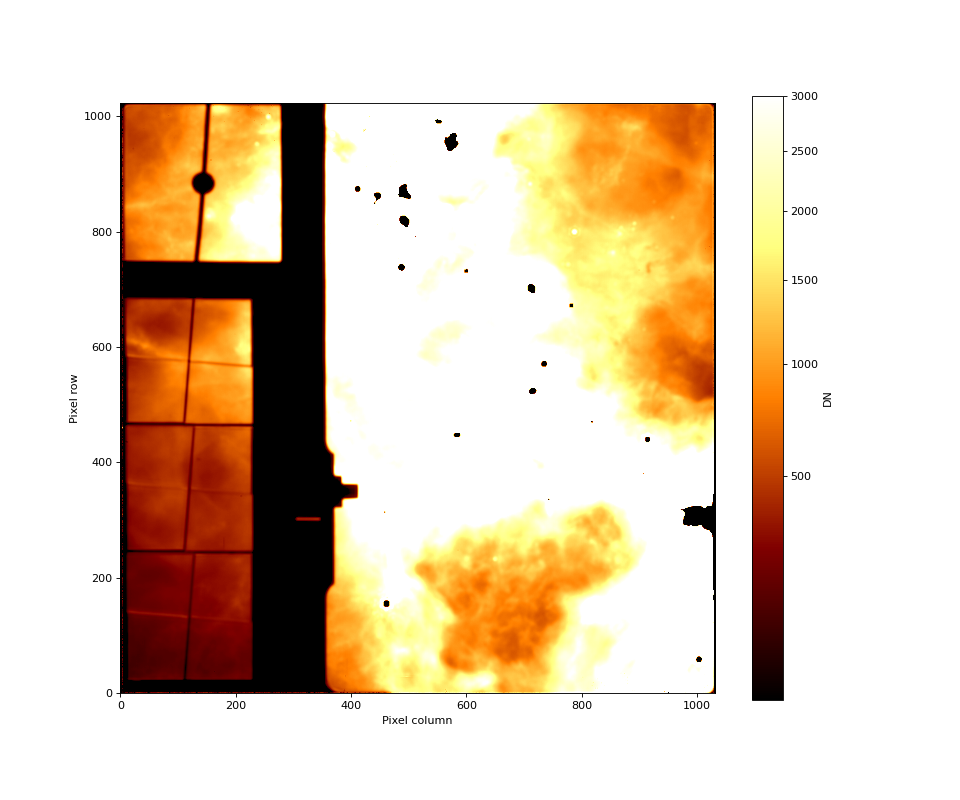

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

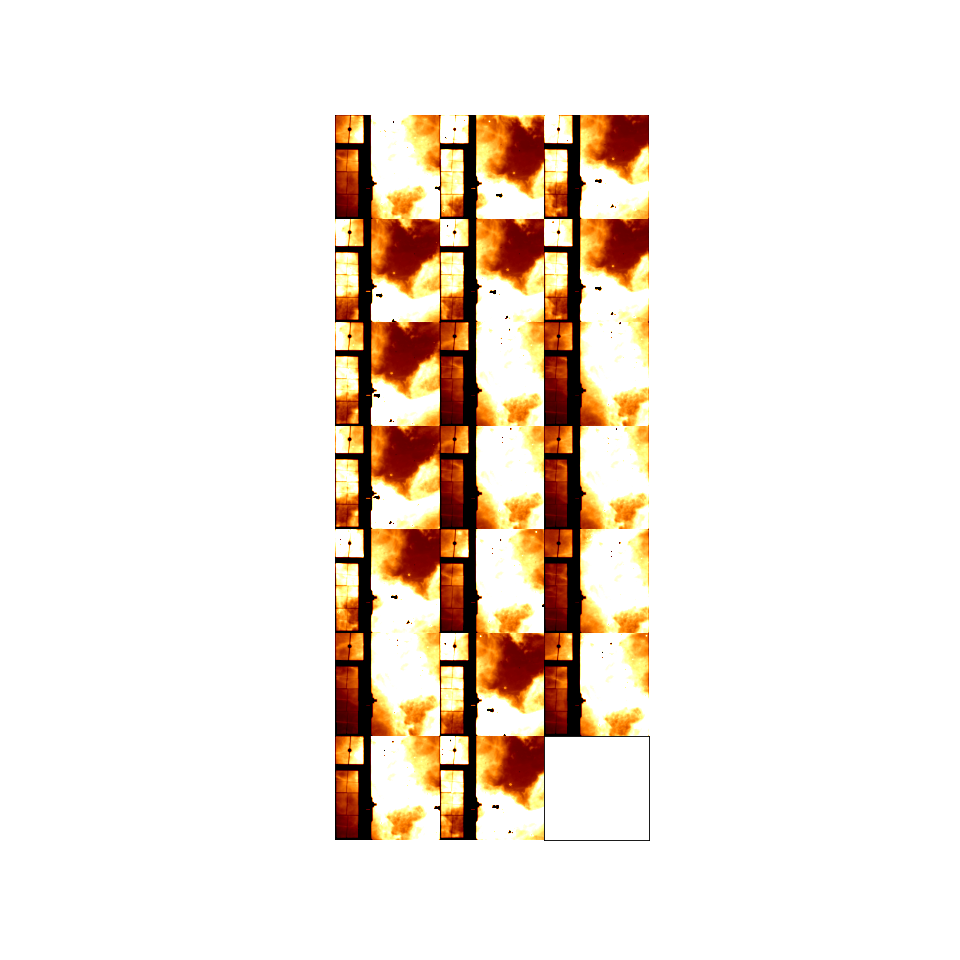

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1800W/stage1/jw02729002002_02107_00007_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00005_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00003_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00006_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00002_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00008_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00007_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002002_02107_00002_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002002_02107_00004_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00010_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002002_02107_00008_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002002_02107_00009_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002001_02107_00004_mirimage_fixed_rate.fits', './F1800W/stage1/jw02729002002_02107_00006_mirimage_fixed_rate.fits', './F1800W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-20 14:05:16,718 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-20 14:05:16,719 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-20 14:05:16,719 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-20 14:05:16,720 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-20 14:05:17,815 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 14:05:17,815 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 14:05:17,817 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:05:17,818 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-20 14:05:17,818 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 14:05:17,820 - stpipe.Image2Pipeline - INFO - Override for FLAT reference file is '/astro/dust_kg3/kgordon/Commissioning/ERO/30Dor/RefFiles/flat_F1800W_kdg_10jun22.fits'.
2022-07-20 14:05:17,823 - stpipe.Image2Pipeline - INFO - Prefetch for FORE 

2022-07-20 14:05:17,853 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-20 14:05:17,853 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-20 14:05:17,853 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 14:05:17,853 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 14:05:17,853 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-20 14:05:17,854 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02107_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-20 14:05:17,857 - stpipe.Image2Pipeline - INFO - Prefetch for AREA r

2022-07-20 14:05:17,891 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-20 14:05:17,891 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 14:05:17,892 - stpipe.Image2Pipeline - INFO - Override for FLAT reference file is '/astro/dust_kg3/kgordon/Commissioning/ERO/30Dor/RefFiles/flat_F1800W_kdg_10jun22.fits'.
2022-07-20 14:05:17,893 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 14:05:17,893 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-20 14:05:17,893 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-20 14:05:17,893 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-20 14:05:17,894 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-20 14:05:17,894 

2022-07-20 14:05:17,919 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02107_00004_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-20 14:05:17,922 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-20 14:05:17,923 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-20 14:05:17,923 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-20 14:05:17,923 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-20 14:05:17,924 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 14:05

2022-07-20 14:05:17,956 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 14:05:17,956 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-20 14:05:17,956 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-20 14:05:17,956 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-20 14:05:17,956 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-20 14:05:17,957 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 14:05:17,957 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-20 14:05:17,957 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-20 14:05:17,958 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-20 14:05:1

2022-07-20 14:05:17,987 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-20 14:05:17,988 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-20 14:05:17,989 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-20 14:05:17,989 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-20 14:05:17,989 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 14:05:17,990 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 14:05:17,991 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:05:17,992 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-20 14:05:18,018 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-20 14:05:18,018 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 14:05:18,018 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-20 14:05:18,018 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-20 14:05:18,019 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-20 14:05:18,019 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-20 14:05:18,019 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 14:05:18,020 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 14:05:18,020 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-

2022-07-20 14:05:18,052 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 14:05:18,052 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 14:05:18,053 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:05:18,053 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-20 14:05:18,054 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 14:05:18,054 - stpipe.Image2Pipeline - INFO - Override for FLAT reference file is '/astro/dust_kg3/kgordon/Commissioning/ERO/30Dor/RefFiles/flat_F1800W_kdg_10jun22.fits'.
2022-07-20 14:05:18,055 - stpipe.Image2Pipeline - INFO - Prefetch for FORE 

2022-07-20 14:05:18,975 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:05:18,975 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:05:18,976 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:05:18,981 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:05:19,089 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-20 14:05:19,103 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
20

2022-07-20 14:05:24,487 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:05:24,594 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-20 14:05:24,608 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 14:05:24,781 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02107_00005_mirimage_fixed_rate.fits>,).
2022-07-20 14:05:24,782 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_o

2022-07-20 14:05:30,114 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 14:05:30,292 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02107_00003_mirimage_fixed_rate.fits>,).
2022-07-20 14:05:30,293 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-20 14:05:30,316 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 14:05:30,316 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:05:

2022-07-20 14:05:35,933 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 14:05:35,934 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:05:36,011 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 14:05:36,012 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-20 14:05:36,012 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-20 14:05:36,012 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-20 14:05:36,052 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-20 14:05:36,054 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-20 14:05:36,054 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:05:36,055 - stpipe.Image2

2022-07-20 14:05:41,618 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-20 14:05:41,618 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-20 14:05:41,618 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-20 14:05:41,660 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-20 14:05:41,662 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-20 14:05:41,662 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:05:41,663 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-20 14:05:41,679 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 14:05:41,863 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002001_02107_00002_mirimage_fixed_rate.fits>,).
2022-07-20 14:05:41,864 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre

2022-07-20 14:05:47,254 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:05:47,255 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.494384
2022-07-20 14:05:47,271 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 14:05:47,456 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002001_02107_00008_mirimage_fixed_rate.fits>,).
2022-07-20 14:05:47,457 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-20 14:05:53,035 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-20 14:05:53,059 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-20 14:05:53,200 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-20 14:05:53,662 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:05:53,984 - stpip

2022-07-20 14:05:58,674 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-20 14:05:58,815 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-20 14:05:59,265 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:05:59,588 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-20 14:06:00,046 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:06:00,383 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-20 14:06:00,836 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:06:01,165 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 14:06:01,618 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:06:01,963 - stpipe.Image2Pipeline.resample 

2022-07-20 14:06:05,608 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:06:05,935 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-20 14:06:06,389 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:06:06,720 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 14:06:07,176 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:06:07,530 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.587420986 -69.074828791 84.587539031 -69.106224340 84.676435051 -69.106158791 84.676189600 -69.074763337
2022-07-20 14:06:08,244 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02729002002_02107_00004_mirimage_fixed_i2d.fits
2022-07-20 14:06:08,244 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-20 14:06:08,245 - stpipe.Image2Pipeline - INFO - Finished pr

2022-07-20 14:06:13,093 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.654652811 -69.075885967 84.655070533 -69.107281189 84.743969482 -69.107107568 84.743424348 -69.075712595
2022-07-20 14:06:13,803 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1800W/stage2/jw02729002001_02107_00010_mirimage_fixed_i2d.fits
2022-07-20 14:06:13,804 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-20 14:06:13,804 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1800W/stage1/jw02729002001_02107_00010_mirimage_fixed
2022-07-20 14:06:13,805 - stpipe.Image2Pipeline - INFO - Processing product ./F1800W/stage1/jw02729002002_02107_00008_mirimage_fixed
2022-07-20 14:06:13,805 - stpipe.Image2Pipeline - INFO - Working on input ./F1800W/stage1/jw02729002002_02107_00008_mirimage_fixed_rate.fits ...
2022-07-20 14:06:14,055 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw0272900

2022-07-20 14:06:19,521 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1800W/stage1/jw02729002002_02107_00008_mirimage_fixed
2022-07-20 14:06:19,522 - stpipe.Image2Pipeline - INFO - Processing product ./F1800W/stage1/jw02729002002_02107_00009_mirimage_fixed
2022-07-20 14:06:19,523 - stpipe.Image2Pipeline - INFO - Working on input ./F1800W/stage1/jw02729002002_02107_00009_mirimage_fixed_rate.fits ...
2022-07-20 14:06:19,773 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002002_02107_00009_mirimage_fixed_rate.fits>,).
2022-07-20 14:06:19,774 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_

2022-07-20 14:06:25,574 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002001_02107_00004_mirimage_fixed_rate.fits>,).
2022-07-20 14:06:25,575 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-07-20 14:06:25,768 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst

2022-07-20 14:06:31,542 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-20 14:06:31,640 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.600245153 -69.077755743 84.600675823 -69.109035842 84.688776276 -69.108900752 84.689030637 -69.077568938
2022-07-20 14:06:31,640 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.600245153 -69.077755743 84.600675823 -69.109035842 84.688776276 -69.108900752 84.689030637 -69.077568938
2022-07-20 14:06:31,640 - stpipe.Image2

2022-07-20 14:06:37,349 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.587565714 -69.078678681 84.587978371 -69.109958811 84.676082632 -69.109830187 84.676355059 -69.078498392
2022-07-20 14:06:37,350 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.587565714 -69.078678681 84.587978371 -69.109958811 84.676082632 -69.109830187 84.676355059 -69.078498392
2022-07-20 14:06:37,350 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-20 14:06:37,415 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-20 14:06:37,624 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002002_02107_00005_mirimage_fixed_rate.fits>,).
2022-07-20 14:06:37,625 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'outp

2022-07-20 14:06:43,101 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-20 14:06:43,167 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-20 14:06:43,383 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002002_02107_00003_mirimage_fixed_rate.fits>,).
2022-07-20 14:06:43,385 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}
2022-07-20 14:06:43,469 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:06:43,470 - stpipe.

2022-07-20 14:06:49,209 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:06:49,209 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:06:49,210 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:06:49,216 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:06:49,327 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-20 14:06:49,342 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
20

2022-07-20 14:06:55,034 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:06:55,150 - stpipe.Image2Pipeline.flat_field - WARNING - /user/kgordon/Python/jwst/jwst/flatfield/flat_field.py:219: RuntimeWarning: invalid value encountered in multiply
  science.var_flat = science.data ** 2 / flat_data_squared * flat_err ** 2

2022-07-20 14:06:55,165 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 14:06:55,387 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02107_00001_mirimage_fixed_rate.fits>,).
2022-07-20 14:06:55,388 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_o

2022-07-20 14:07:00,967 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 14:07:01,184 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02107_00010_mirimage_fixed_rate.fits>,).
2022-07-20 14:07:01,186 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-20 14:07:01,208 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 14:07:01,208 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:07:

2022-07-20 14:07:06,969 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 14:07:06,969 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:07:07,045 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 14:07:07,046 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-20 14:07:07,046 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-20 14:07:07,046 - stpipe.Image2Pipeline.photom - INFO -  filter: F1800W
2022-07-20 14:07:07,087 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-20 14:07:07,089 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-20 14:07:07,089 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:07:07,090 - stpipe.Image2

2022-07-20 14:07:26,245 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline done


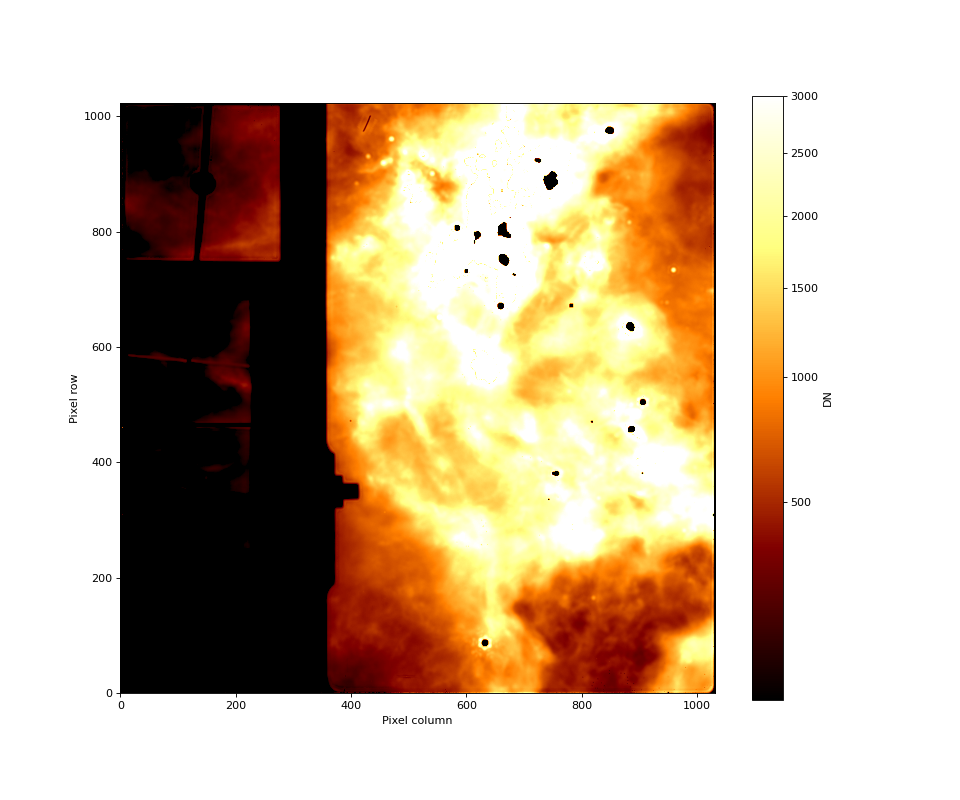

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

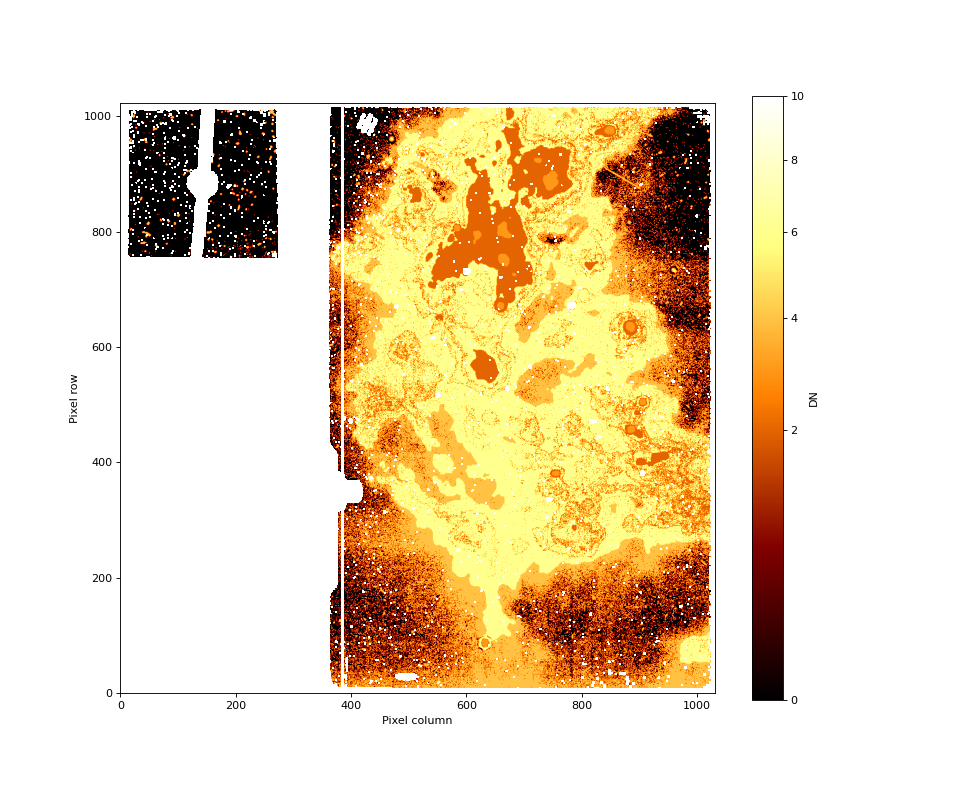

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

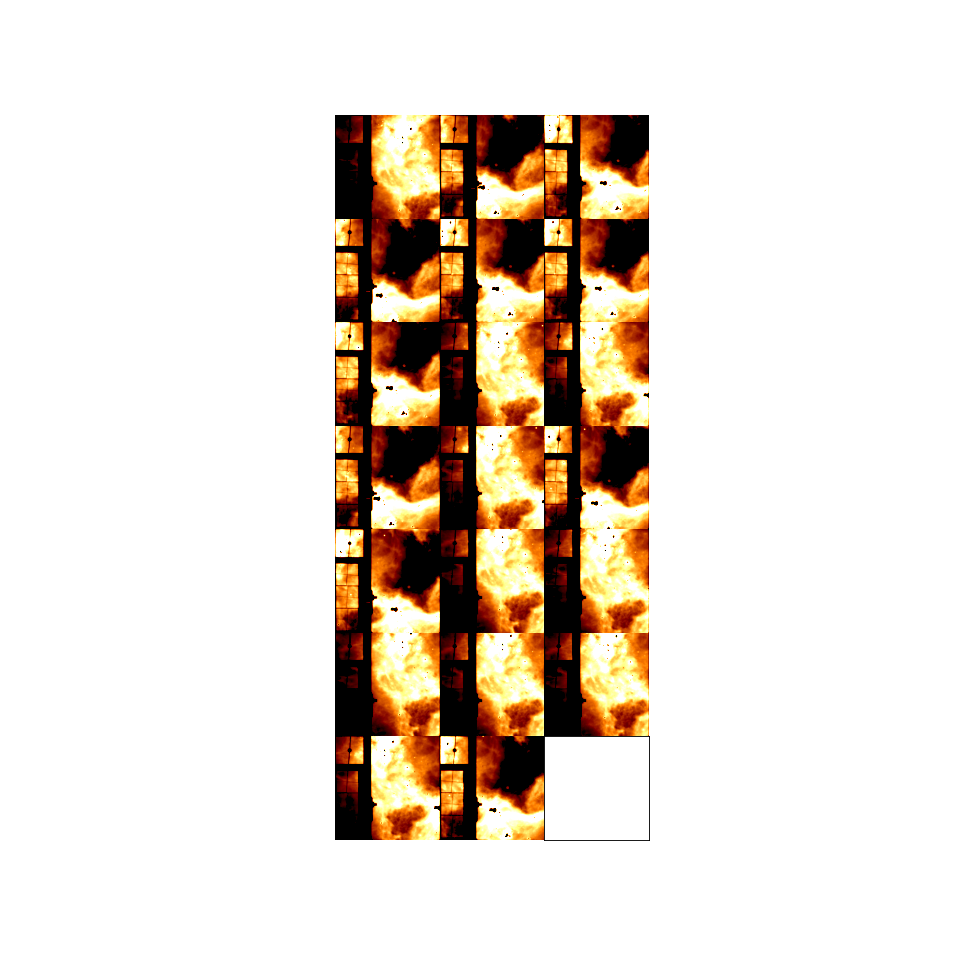

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1800W/stage2/jw02729002002_02107_00005_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002002_02107_00004_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002002_02107_00003_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002001_02107_00010_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002001_02107_00004_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002002_02107_00002_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002001_02107_00006_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002001_02107_00008_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002001_02107_00005_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002002_02107_00009_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002002_02107_00010_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002002_02107_00008_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002002_02107_00001_mirimage_fixed_wcs_cal.fits', './F1800W/stage2/jw02729002001_02107_00007_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-20 14:08:03,160 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-20 14:08:03,161 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 14:08:03,162 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-20 14:08:03,163 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-20 14:08:03,641 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:08:03,643 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-20 14:08:07,672 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-20 14:08:07,674 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 5.2, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-20 14:08:47,048 - stpipe.Image3Pipeline.outlier_detection - WARNING - /user/kgordon/Python/jwst/jwst/outlier_detection/outlier_detection.py:427: RuntimeWarning: overflow encountered in multiply
  threshold2 = scale2 * blot_deriv + snr2 * err_data

2022-07-20 14:08:47,070 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 48509 (4.59%)
2022-07-20 14:08:47,141 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 32756 (3.10%)
2022-07-20 14:08:47,212 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 41268 (3.91%)
2022-07-20 14:08:47,283 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 53262 (5.04%)
2022-07-20 14:08:47,351 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 45705 (4.32%)
2022-07-20 14:08:47,422 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 26597 (2.52%)
2022-07-20 14:08:4

2022-07-20 14:09:25,069 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:26,002 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:26,939 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:27,948 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:28,889 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:29,825 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:30,748 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:31,680 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:32,604 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 14:09:33,529 - stpipe.Image3Pipelin

2022-07-20 14:10:31,880 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 1000, 'kernel_fwhm': 2.0, 'snr_threshold': 5, 'npixels': 25, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}
2022-07-20 14:10:31,898 - stpipe.Image3Pipeline.source_catalog - INFO - Using APCORR reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_apcorr_0008.fits
2022-07-20 14:10:31,907 - stpipe.Image3Pipeline.source_catalog - INFO - Using ABVEGAOFFSET reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf
2022-07-20 14:10:31,908 - stpipe.Image3Pipeline.source_catalog - INFO - 

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

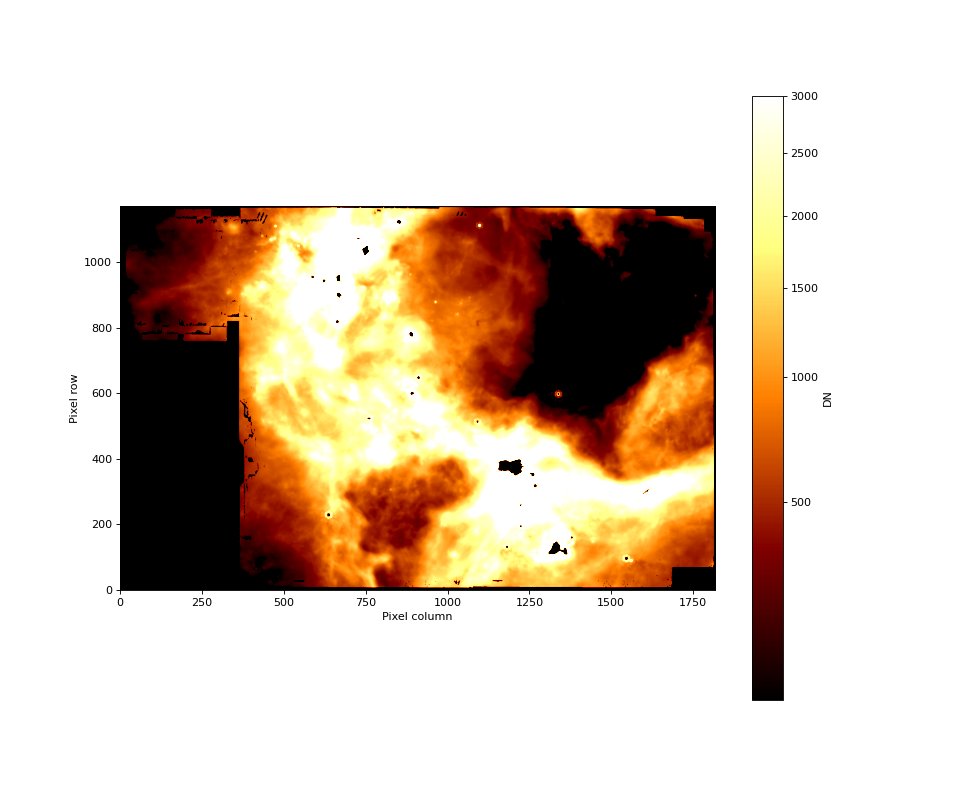

In [26]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

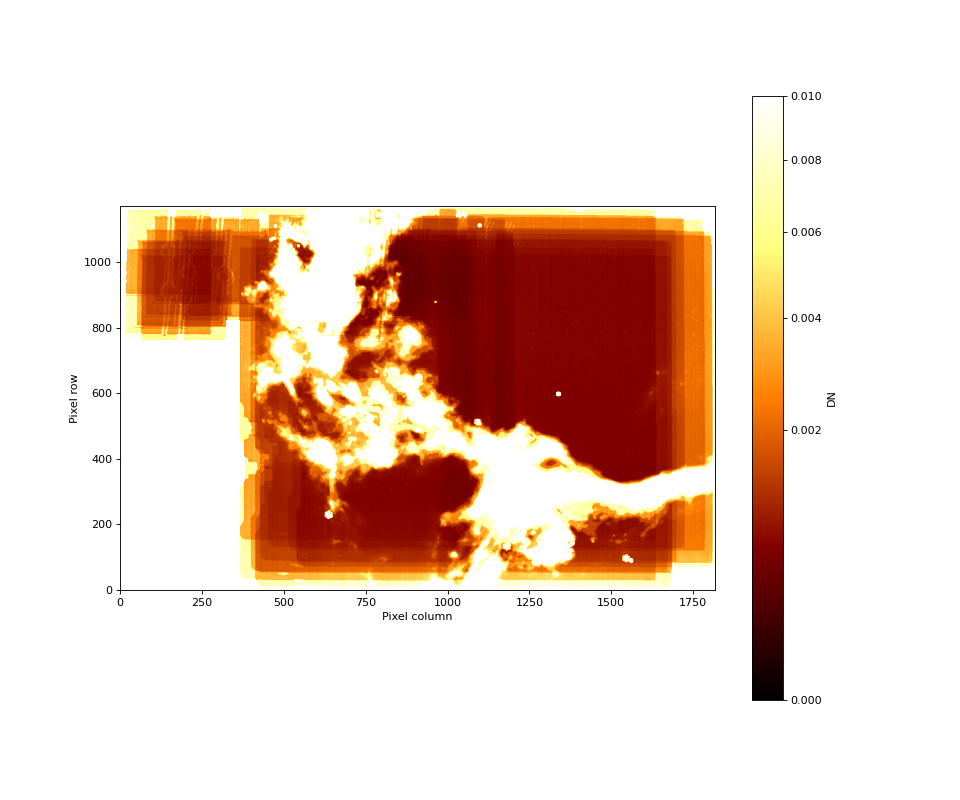

In [27]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

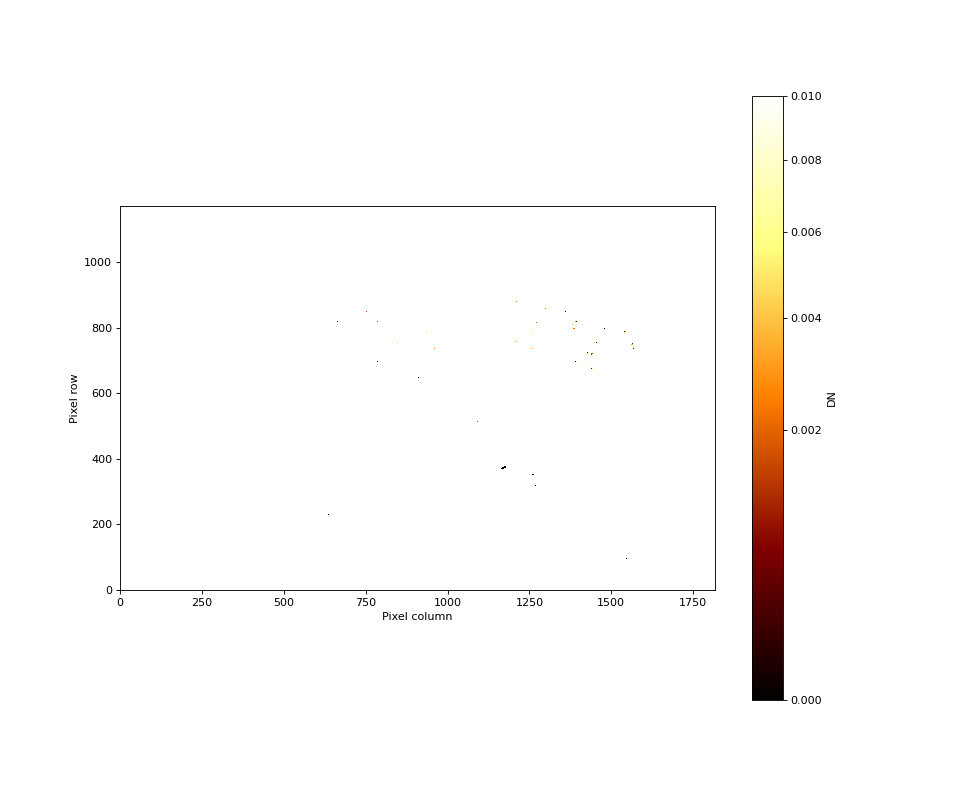

In [28]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

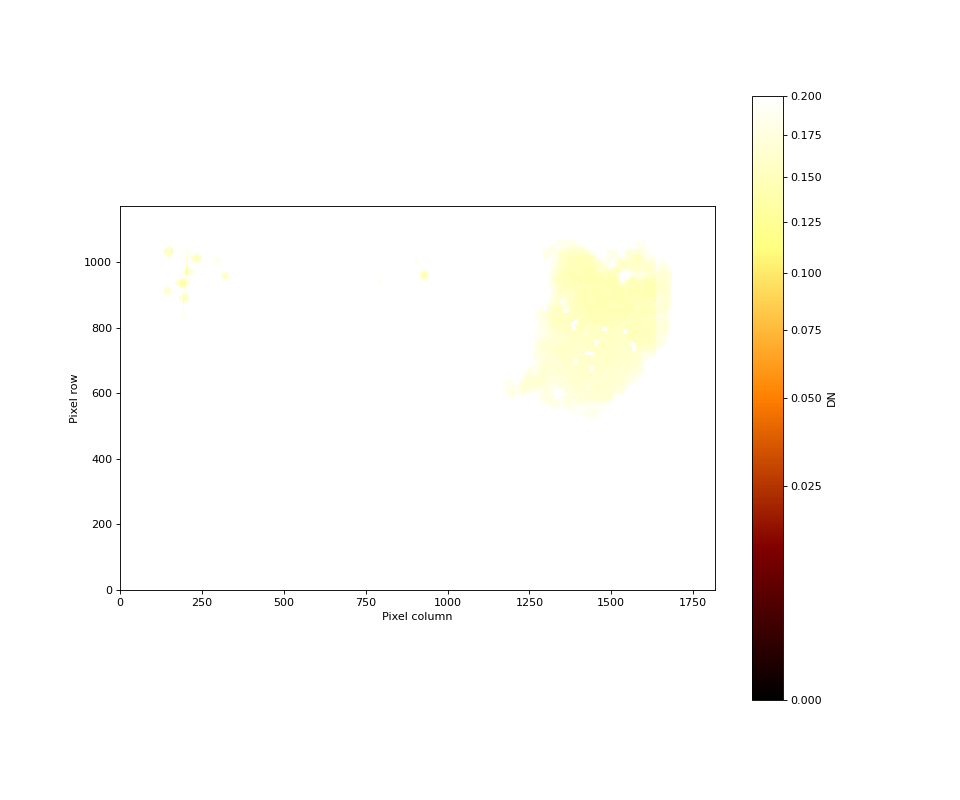

In [29]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

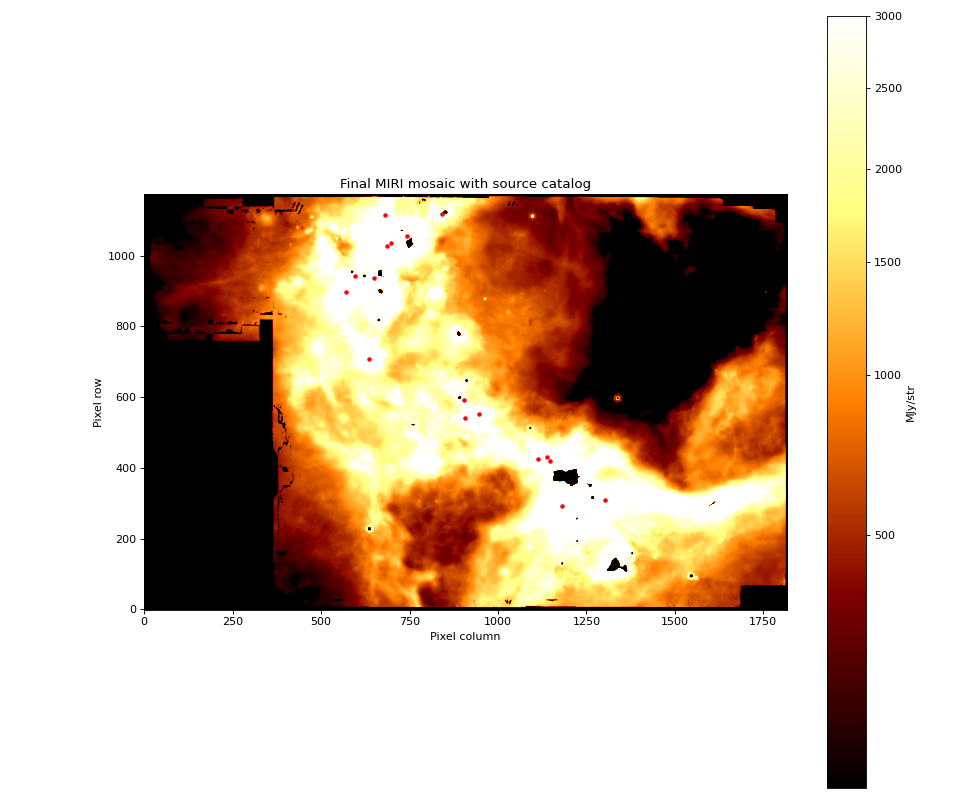

In [30]:
if os.path.isfile(miri_catalog_file):
    # Read in the source catalog
    miri_source_cat = ascii.read(miri_catalog_file)
    # Show the catalog sources on the mosaic
    overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                    title='Final MIRI mosaic with source catalog', dmap=dmap)